## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.isna().sum() # пропущенные значения

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

#### Файл содержит данные о 16715 играх, каждая игра  описывается 11 признаками. Некоторые признаки содержат пропущенные значения, которые необходимо обработать и преобразовать  данные в нужные типы.

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


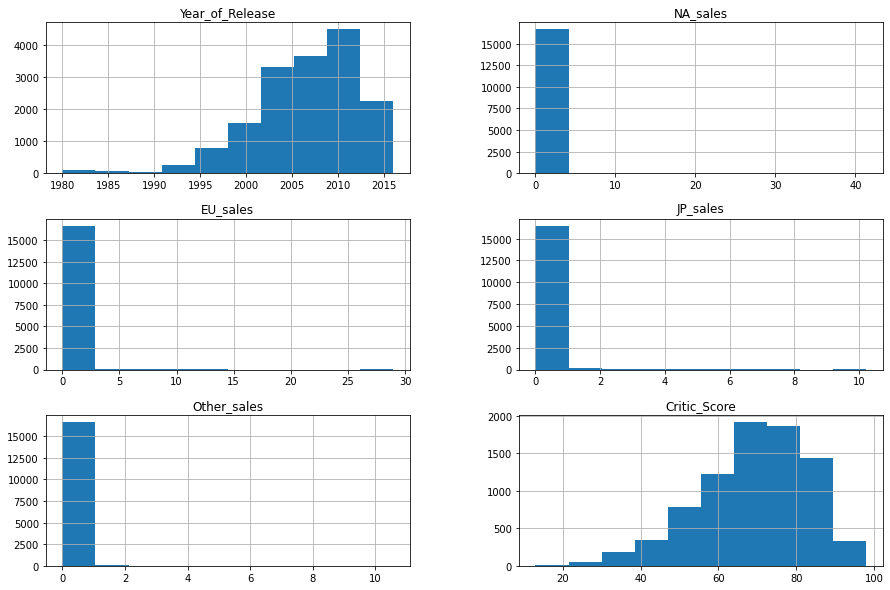

In [4]:
df.hist(figsize=(15, 10))
df.describe()

### Предобработка данных

Приведем название столбцов к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Оценки пользователей приведем к типу float.
Столбец оценки пользователей содержит значение 'tbd', вероятно, это аббревиатура 'To Be Determined' (предстоит определить). Т.е. 'tbd' фактически и является NaN, заменим NaN.  

In [6]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:

df['user_score'] = df['user_score'].replace('tbd', np.NaN) # заменим значение 'tbd' на NaN
df['user_score'] = df['user_score'].astype('float64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Заполнить пропуски в столбцах 'critic_score', 'user_score' не представляется  возможным, поэтому  оставим их незаполненными. Кроме того, пропусков очень много и их заполнение каким-либо значением может исказить наши оценки. Т.к. система ESRB существует только в США, Канаде и Мексике, в столбце  'rating' заменим пустые значения на 'unknown'.

In [8]:
df['rating']= df['rating'].fillna('unknown')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец 'total_sales'.

In [9]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


###  Исследовательский анализ данных.

Посмотрим сколько игр выпускалось в разные годы. 

Text(0.5, 1.0, 'Количество игр выпущенных в разные годы')

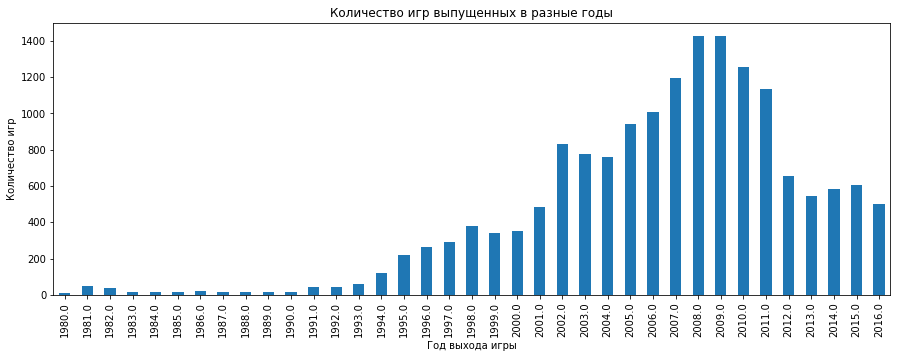

In [10]:
# создадим сводную таблицу и визиализируем данные
df.groupby('year_of_release')['name'].count().plot(kind='bar',figsize=(15, 5))
plt.xlabel("Год выхода игры")
plt.ylabel("Количество игр")
plt.title("Количество игр выпущенных в разные годы")

####  В 2000 -2002 году произошел резкий скачок по количеству выпущенных игр в год.  В 2008-2009 выпускается максимальное количество игр. С 2010 года наблюдается спад в производсве игр. Вероятно, это связанно с падением интереса к играм, соответственно, упало и их производство.


Посмотрим продажи по различным платформам  за анализируемый период.

Text(0.5, 1.0, 'Продажи по различным платформам за анализируемый период')

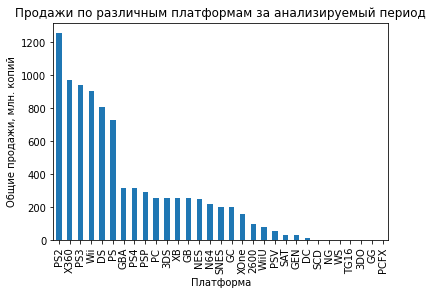

In [11]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending= False).plot(kind='bar')
plt.xlabel("Платформа")
plt.ylabel("Общие продажи, млн. копий")
plt.title("Продажи по различным платформам за анализируемый период")

 Выберем топ-5 платформ с наибольшими суммарными продажами и  построим графики динамики продаж по годам по каждой платформе.

In [12]:
top_platforms = list(df.groupby('platform')['total_sales'].sum().sort_values(ascending= False)[:5].index)
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

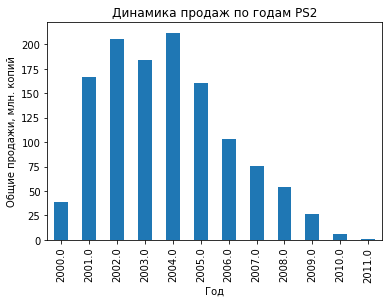

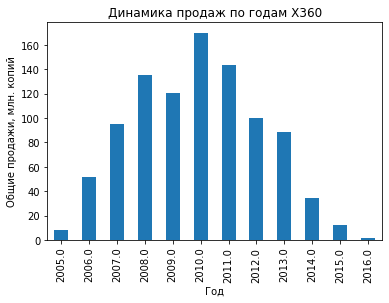

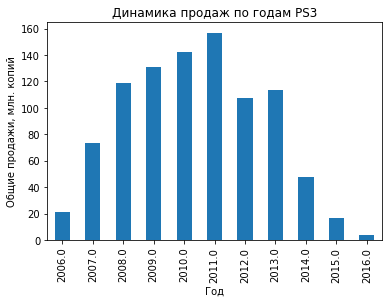

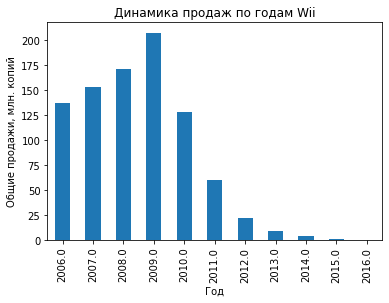

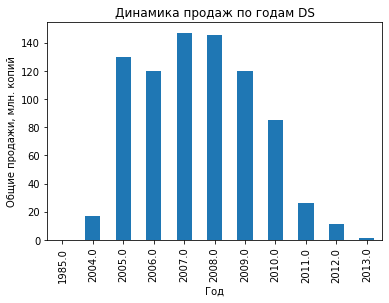

In [13]:
for value in top_platforms:
    df[df.platform== value].groupby("year_of_release")['total_sales'].sum().plot(kind='bar')
    plt.xlabel("Год")
    plt.ylabel("Общие продажи, млн. копий")
    plt.title("Динамика продаж по годам " + value)
    plt.show()
    


#### Из графиков выше видно, что характерное время жизни платформы составляет 9-10 лет.
#### В качестве актуального периода возьмем срок с 2013 года.

In [14]:
df_up_to_date = df[df['year_of_release']>=2013] #выбор актуального периода
df_up_to_date


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Построим графики динамики продаж по годам для различных платформ для актуального периода.

In [15]:
piv_up_to_date= pd.pivot_table(df_up_to_date,index=["platform","year_of_release"],values='total_sales', aggfunc='sum')
piv_up_to_date

total_sales
platform year_of_release             
3DS      2013.0                 56.57
         2014.0                 43.76
         2015.0                 27.78
         2016.0                 15.14
DS       2013.0                  1.54
PC       2013.0                 12.38
         2014.0                 13.28
         2015.0                  8.52
         2016.0                  5.25
PS3      2013.0                113.25
         2014.0                 47.76
         2015.0                 16.82
         2016.0                  3.60
PS4      2013.0                 25.99
         2014.0                100.00
         2015.0                118.90
         2016.0                 69.25
PSP      2013.0                  3.14
         2014.0                  0.24
         2015.0                  0.12
PSV      2013.0                 10.59
         2014.0                 11.90
         2015.0                  6.25
         2016.0                  4.25
Wii      2013.0                  8.59
         2014.0                  3.75
         2015.0                  1.14
         2016.0                  0.18
WiiU     2013.0                 21.65
         2014.0                 22.03
         2015.0                 16.35
         2016.0                  4.60
X360     2013.0                 88.58
         2014.0                 34.74
         2015.0                 11.96
         2016.0                  1.52
XOne     2013.0                 18.96
         2014.0                 54.07
         2015.0                 60.14
         2016.0                 26.15

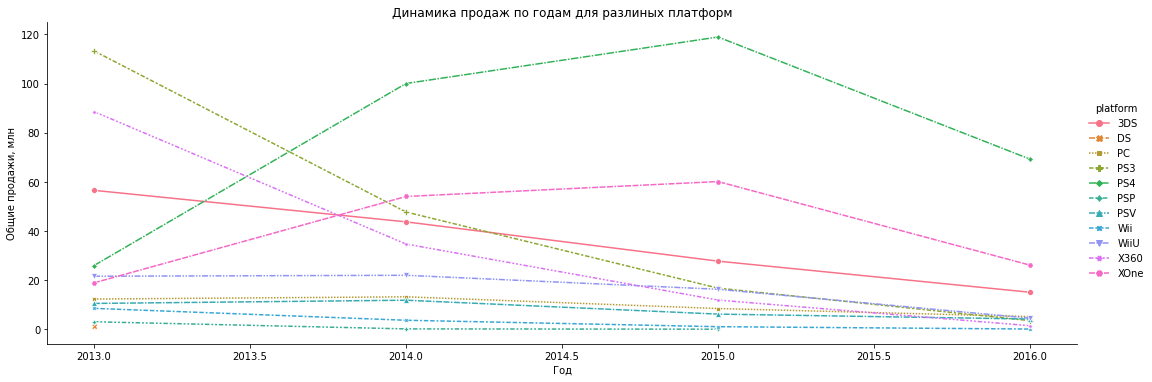

In [16]:
sns.relplot(x="year_of_release", 
            y='total_sales', 
            hue='platform',
            kind='line',
            style='platform',
            markers=True,
            height=5,
            aspect=3,
            data=piv_up_to_date).set(xlabel='Год',ylabel='Общие продажи, млн',title='Динамика продаж по годам для разлиных платформ')            

####  Очевидно, что продажи по всем платформам падают. Потенциально прибыльными платформами на конец 2016 года являются 'PS4', 'XOne', '3DS'.

Построим диаграммы размаха по общим продажам игр в разбивке по платформам.

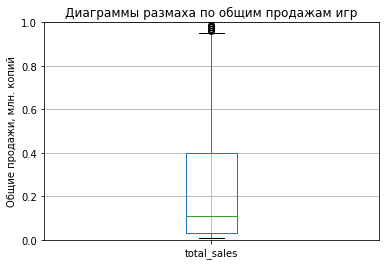

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64
1090.69


In [17]:
df_up_to_date.boxplot(column=['total_sales'])
plt.title('Диаграммы размаха по общим продажам игр')
plt.ylabel("Общие продажи, млн. копий")
plt.ylim(0,1)
plt.show()
print(df_up_to_date['total_sales'].describe())
print(df_up_to_date['total_sales'].sum())

#### В период с 2013 года по 2016 год было выпущено приблизительно  2,2 тыс. игр,  продано приблизительно 1 миллиарда копий игр. В среднем, продажи  каждой игры составляют 0,5  млн копий, медиана - 0,11  миллиона копий. Есть хиты, продажи которых в десятки  раз превышают среднее значение.

(0.0, 1.0)

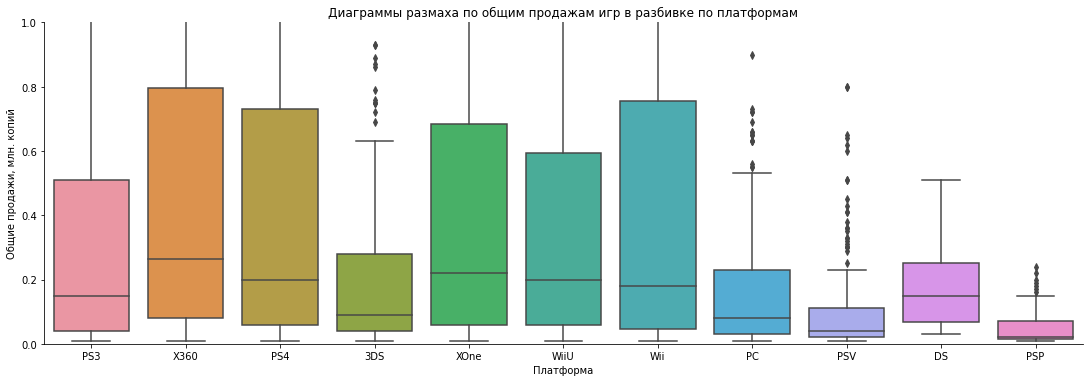

In [18]:
sns.catplot(x='platform', y="total_sales", kind="box",height=5, aspect=3, data=df_up_to_date)
plt.xlabel("Платформа")
plt.ylabel("Общие продажи, млн. копий")
plt.title("Диаграммы размаха по общим продажам игр в разбивке по платформам")
plt.ylim(0,1)

#### Наибольшие медианные продажи  показывают  платформы X360, XOne, WiiU, Wii, PS4.  Медианные продажи 0,2 -0,3 млн. копий. Многие платформы  имеют выбросы - это игры, которые "выстрелили". Платформа PSP имеет самые маленькие продажи.

Оценим влияние отзывов пользователей и критиков на продажи. Исследования проведем на основе данных для платформ 'X360','XOne', 'PS4'.

Платформа X360
              critic_score  user_score  total_sales
critic_score      1.000000    0.520946     0.350345
user_score        0.520946    1.000000    -0.011742
total_sales       0.350345   -0.011742     1.000000


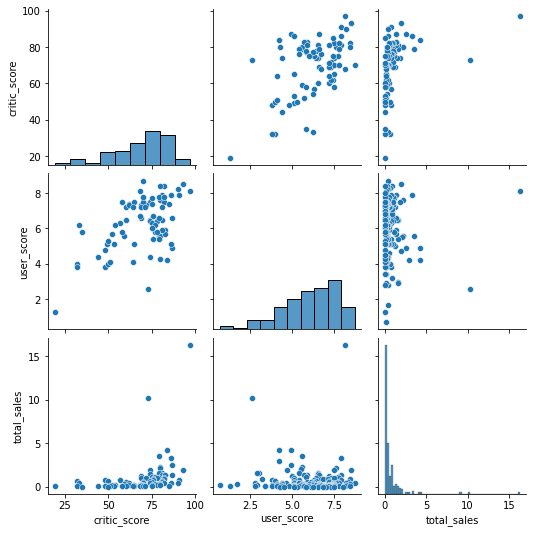

Платформа XOne
              critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.416998
user_score        0.472462    1.000000    -0.068925
total_sales       0.416998   -0.068925     1.000000


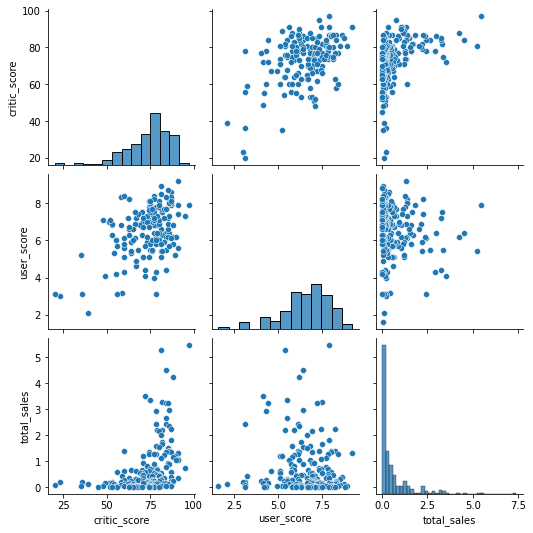

Платформа PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000


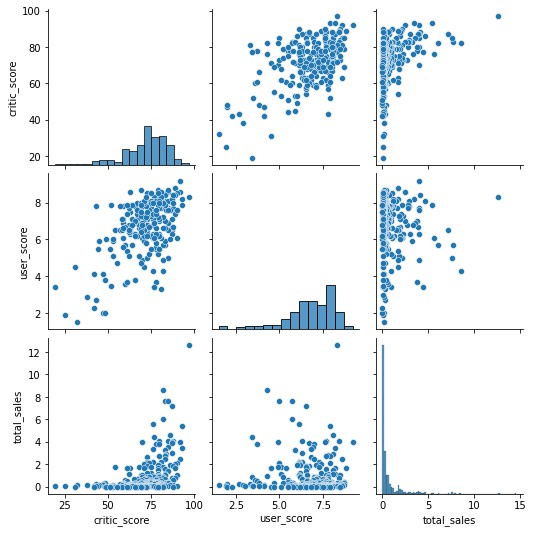

In [19]:
for platform in ['X360','XOne', 'PS4']:
    print ('Платформа ' + platform )
    sns.pairplot(df_up_to_date[df_up_to_date.platform == platform][['critic_score', 'user_score','total_sales']])
    print(df_up_to_date[df_up_to_date.platform == platform][['critic_score', 'user_score','total_sales']].corr())
    plt.show()
    

#### Высокая оценка критиков как правило увеличивает продажу игры, в то время как оценка пользователей практически не влияет на продажи. Наблюдается слабая кореляция между оценками критиков и продажами игр, корреляция между оценками пользователей  и продажами отсутсвует.  Коэффициент   корреляция между total_sales и critic_score равен  0.35-0.42.

Посмотрим на  распределение проданных игр по жанрам. Исследуем  медианы продаж.

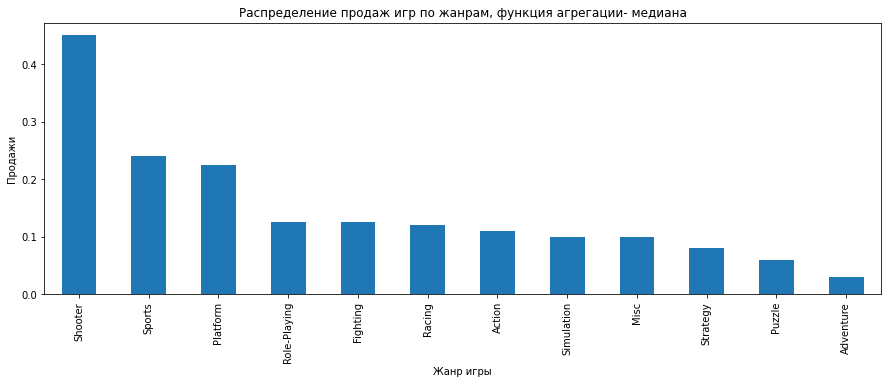

In [20]:
df_up_to_date.groupby('genre')['total_sales'].median().sort_values(ascending= False).plot(kind='bar',figsize=(15, 5))
plt.xlabel("Жанр игры")
plt.ylabel("Продажи")
plt.title("Распределение продаж игр по жанрам, функция агрегации- медиана")
plt.show()

#### Больше всего  поклонников у игр жанра Shooter, затем идут Sports и Platform. Аутсайдерами по продажам являются жанры Strategy,	Puzzle,  Adventure.  


### Составим портрет пользователя каждого региона

Определим топ-5 платформ для каждого региона.

In [21]:
piv_region= pd.pivot_table(df_up_to_date,index="platform",values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
piv_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.29,0.00
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


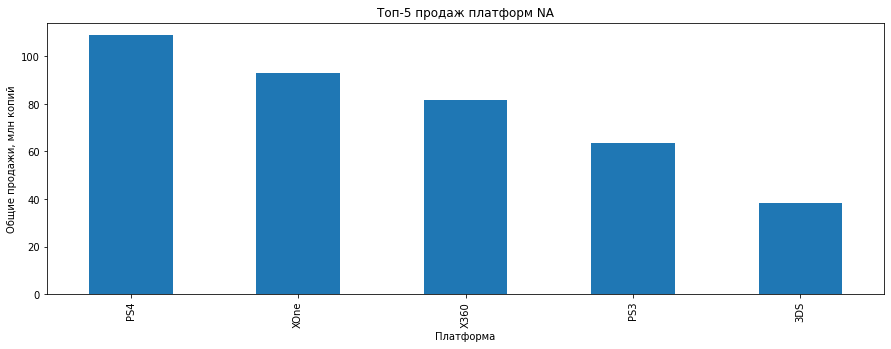

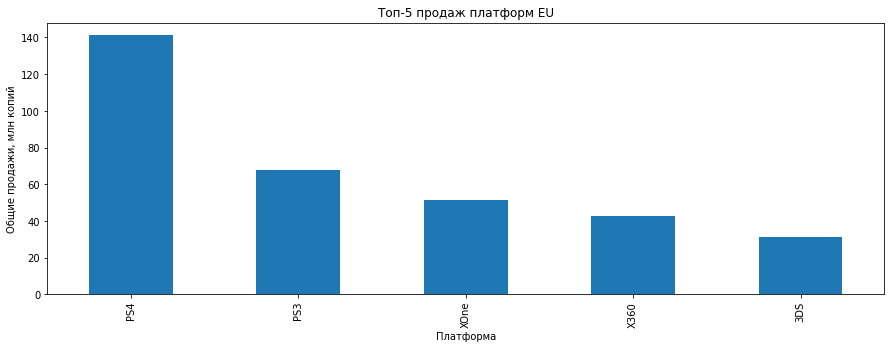

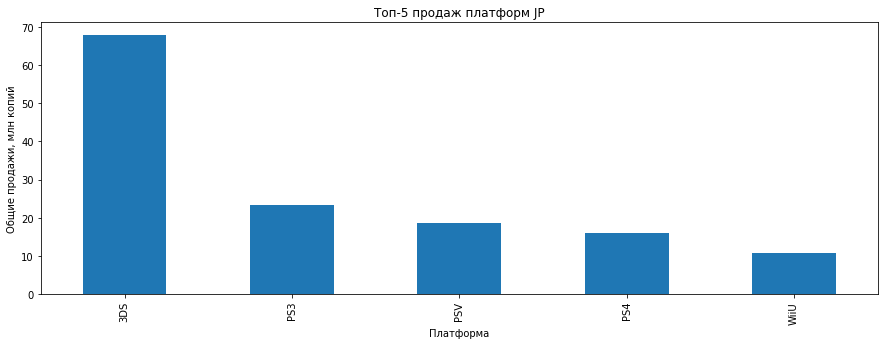

In [22]:
for region in ['na','eu', 'jp']:
    df_up_to_date.groupby('platform')[region+ '_sales'].sum().sort_values(ascending= False)[:5].plot(kind='bar',figsize=(15, 5))
    plt.xlabel("Платформа")
    plt.ylabel("Общие продажи, млн копий")
    plt.title("Топ-5 продаж платформ " + region.upper())
    plt.show()
    

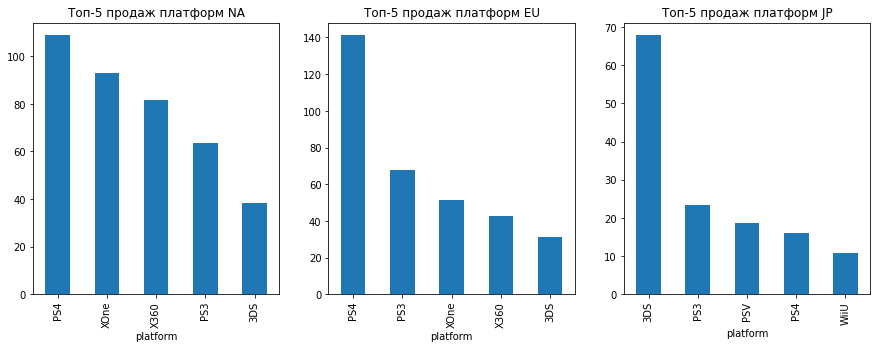

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
num= 0
for region in ['na','eu', 'jp']:
    df_up_to_date.groupby('platform')[region+ '_sales'].sum().sort_values(ascending= False)[:5].plot(kind='bar',figsize=(15, 5),ax = ax[num])
    ax[num].set_title("Топ-5 продаж платформ " + region.upper())
    num +=1  
     


#### В Северной Америке  популярны приставки PS4, XOne и X360.
#### Европейцы предпочитают PS4, PS3 и XOne.
#### В Японии популярны 3DS, PS3 и PSV.

Определим самые популярные жанры игр для каждого региона.

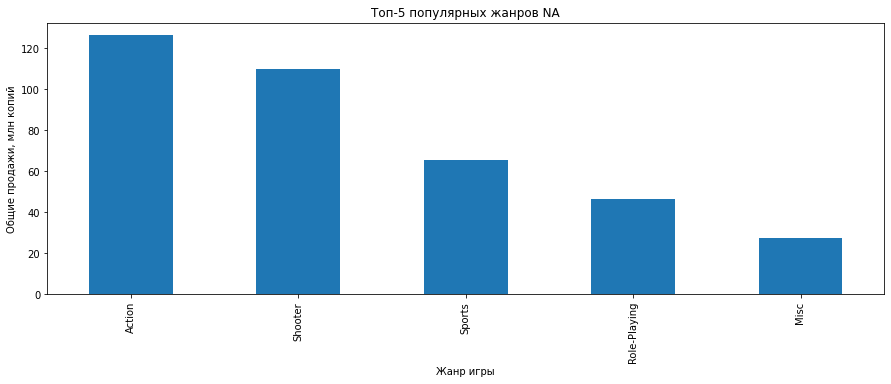

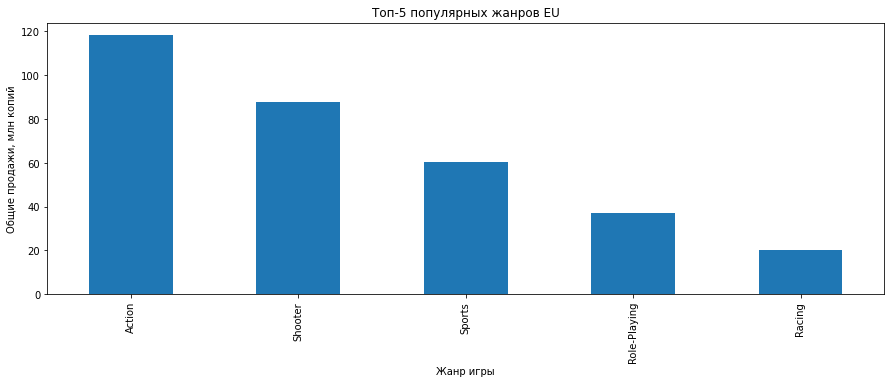

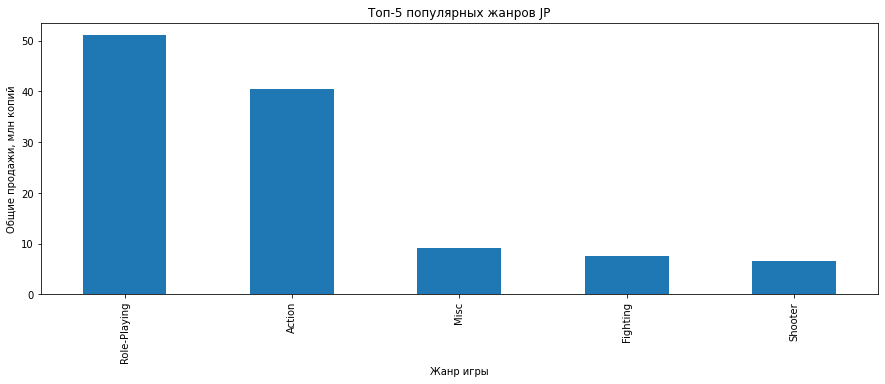

In [24]:
for region in ['na','eu', 'jp']:
    df_up_to_date.groupby('genre')[region+ '_sales'].sum().sort_values(ascending= False)[:5].plot(kind='bar',figsize=(15, 5))
    plt.xlabel("Жанр игры")
    plt.ylabel("Общие продажи, млн копий")
    plt.title("Топ-5 популярных жанров " + region.upper())
    plt.show()

#### В Северной Америке и Европе предпочитают игры жанра Action, Sports и Shooter. В Северной Америке больше играют в Misc, в Европе же чаще выбирают Racing.
#### В Японии с большим отрывом лидируют  жанры Role-Playing и Action.  Далее Misc.


Опредлеим влияние рейтинга ESRB на продажи в каждом регионе.

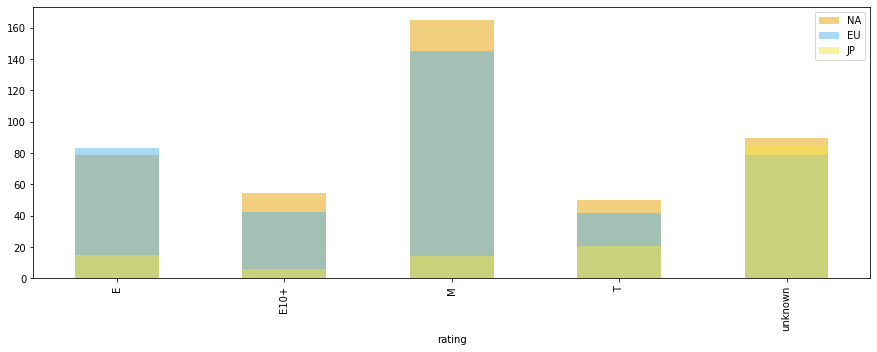

In [25]:
df_up_to_date.groupby('rating')['na_sales'].sum().plot(kind='bar',figsize=(15, 5), alpha = 0.5,color = '#E69F00', label='NA')
df_up_to_date.groupby('rating')['eu_sales'].sum().plot(kind='bar',figsize=(15, 5), alpha = 0.5, color = '#56B4E9',label='EU')
df_up_to_date.groupby('rating')['jp_sales'].sum().plot(kind='bar',figsize=(15, 5), alpha = 0.5,color = '#F0E442', label='JP')
plt.legend(loc='upper right')
plt.show()
    

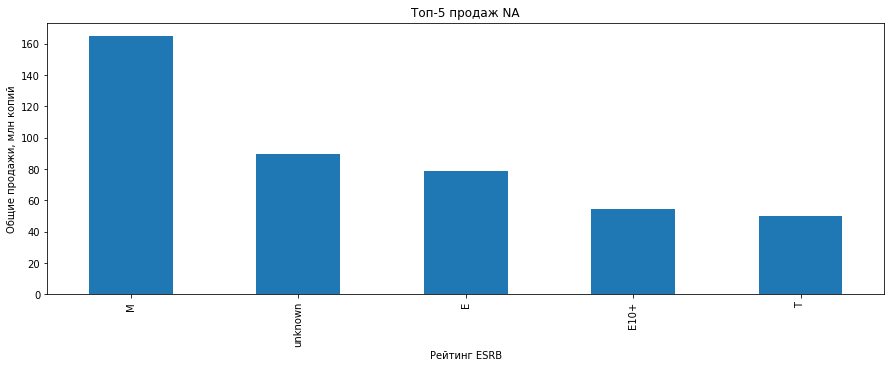

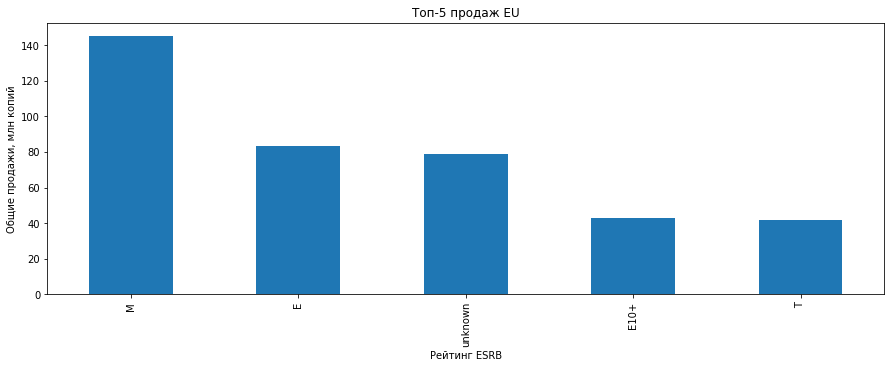

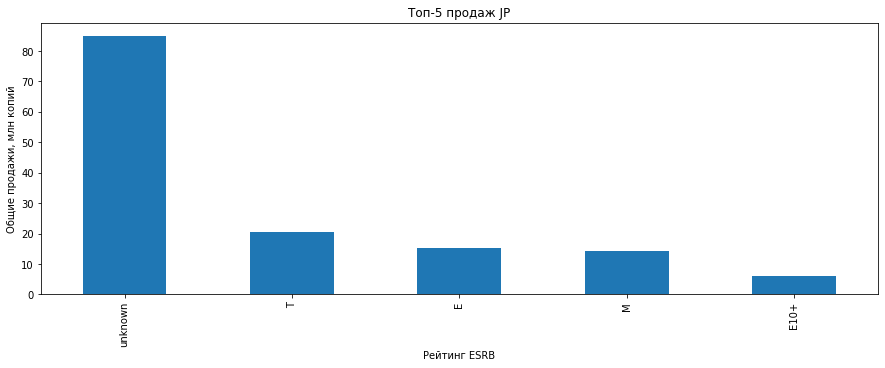

In [26]:
for region in ['na','eu', 'jp']:
    df_up_to_date.groupby('rating')[region+ '_sales'].sum().sort_values(ascending= False)[:5].plot(kind='bar',figsize=(15, 5))
    plt.xlabel("Pейтинг ESRB")
    plt.ylabel("Общие продажи, млн копий")
    plt.title("Топ-5 продаж " + region.upper())
    plt.show()

#### В Северной Америке и в Европе больше всего игр продается с рейтингом "для лиц старше 17 лет", игры с рейтингом "для всех возрастных категорий" и игры с неизвестным рейтингом.

#### В Японии лидируют продажи  игр  с неизвестным рейтингом (т.к. система ESRB существует только в США, Канаде и Мексике),  на втором месте   игры "для лиц от 13 лет" и затем игры  "для всех возрастных категорий".

### Проверка гипотез

Проверим гипотезу:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки  гипотезы будем использовать t-критерий Стьюдента. Определим пороговое значение alpha = 0.05
* Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [27]:
xbox_one = df_up_to_date[df_up_to_date['platform'] == 'XOne']['user_score'].dropna() # удалим пустые значения
pc = df_up_to_date[df_up_to_date['platform'] == 'PC']['user_score'].dropna()
results = st.ttest_ind(xbox_one, pc)
print('p-значение: ', results.pvalue) # вывод значения p-value на экран 
alpha =.05 # alpha =  значение уровня значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


#### Cредняя оценка пользователей платформы XBox One не  отличается от средней оценки пользователей платформы PC. Гипотеза  подтвердилась.

Проверим гипотезу:
* Средние пользовательские рейтинги жанров Action  и Sports  разные

* Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
* Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [28]:
action = df_up_to_date[df_up_to_date['genre'] == 'Action']['user_score'].dropna() # удалим пустые значения
sport = df_up_to_date[df_up_to_date['genre'] == 'Sports']['user_score'].dropna()
results = st.ttest_ind(action, sport, equal_var = False)
print('p-значение: ', results.pvalue) # вывод значения p-value на экран 
alpha =.05 # alpha =  значение уровня значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтверилась.

### Общий вывод

* Резкий рост выпуска игр приходится на 2000-2002 год, а пик на 2008-2009 годы.С 2010 года наблюдается спад в производсве игр.
* Характерный срок жизни платформы - 10 лет
* Потенциально прибыльными платформами на конец 2016 года являются 'PS4', 'XOne', '3DS'.
* Наибольшие медианные продажи показывают платформы X360, XOne, WiiU, Wii, PS4. Медианные продажи 0,2 -0,3 млн. копий. Многие платформы имеют выбросы - это игры, которые "выстрелили". Платформа PSP имеет самые маленькие продажи
* Оценки критиков слабо влияют на общие продажи, оценки пользователей не влияют совсем.
* Больше всего поклонников у игр жанра Shooter, затем идут Sports и Platform. Аутсайдерами по продажам являются жанры Strategy, Puzzle, Adventure.
* В Северной Америке популярны приставки PS4, XOne и X360. Европейцы предпочитают PS4, PS3 и XOne.В Японии популярны 3DS, PS3 и PSV.
* В Северной Америке и Европе предпочитают игры жанра Action, Sports и Shooter. В Японии с большим отрывом лидируют  жанры Role-Playing и Action.
* В Северной Америке и в Европе больше всего игр продается с рейтингом "для лиц старше 17 лет" и игры с рейтингом "для всех возрастных категорий". В Японии лидируют продажи игр с неизвестным рейтингом ,т.к. система ESRB существует только в США, Канаде и Мексике, на втором месте игры "для лиц от 13 лет" и затем игры "для всех возрастных категорий"..
* Cредняя оценка пользователей платформы XBox One не отличается от средней оценки пользователей платформы PC.
* Средние пользовательские рейтинги жанров Action и Sports разные.
